<a href="https://colab.research.google.com/github/jnagabooshanam-hub/ChurnPrediction_Project/blob/main/Customer_Churn_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)


# 2. LOAD DATA


In [2]:
import pandas as pd
url = r"https://raw.githubusercontent.com/jnagabooshanam-hub/ChurnPrediction_Project/refs/heads/main/.github/workflows/Customer-Churn.csv"
df = pd.read_csv(url,on_bad_lines='skip')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# 3. DATA Cleaning

In [8]:
# check if any data is null
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
print(df.columns.tolist())
#df.head()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors="coerce")
df = df.dropna()
df.info()

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  Onlin

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

# 4. DESCRIPTIVE ANALYSIS

In [11]:
print(df.describe(include="all"))

        customerID gender  SeniorCitizen Partner Dependents       tenure  \
count         7032   7032    7032.000000    7032       7032  7032.000000   
unique        7032      2            NaN       2          2          NaN   
top     3186-AJIEK   Male            NaN      No         No          NaN   
freq             1   3549            NaN    3639       4933          NaN   
mean           NaN    NaN       0.162400     NaN        NaN    32.421786   
std            NaN    NaN       0.368844     NaN        NaN    24.545260   
min            NaN    NaN       0.000000     NaN        NaN     1.000000   
25%            NaN    NaN       0.000000     NaN        NaN     9.000000   
50%            NaN    NaN       0.000000     NaN        NaN    29.000000   
75%            NaN    NaN       0.000000     NaN        NaN    55.000000   
max            NaN    NaN       1.000000     NaN        NaN    72.000000   

       PhoneService MultipleLines InternetService OnlineSecurity  ...  \
count         

In [12]:
print(df["Churn"].value_counts(normalize=True))

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64


# 5. VISUALIZATION

In [13]:
import matplotlib.pyplot as plt

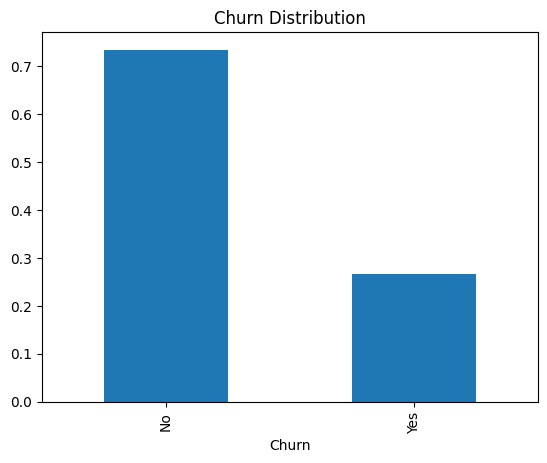

In [14]:
# Categorical Features:

# We'll examine the distribution of key categorical variables and the target.

# Target variable: Churn

df['Churn'].value_counts(normalize=True).plot(kind='bar', title='Churn Distribution')
plt.show()

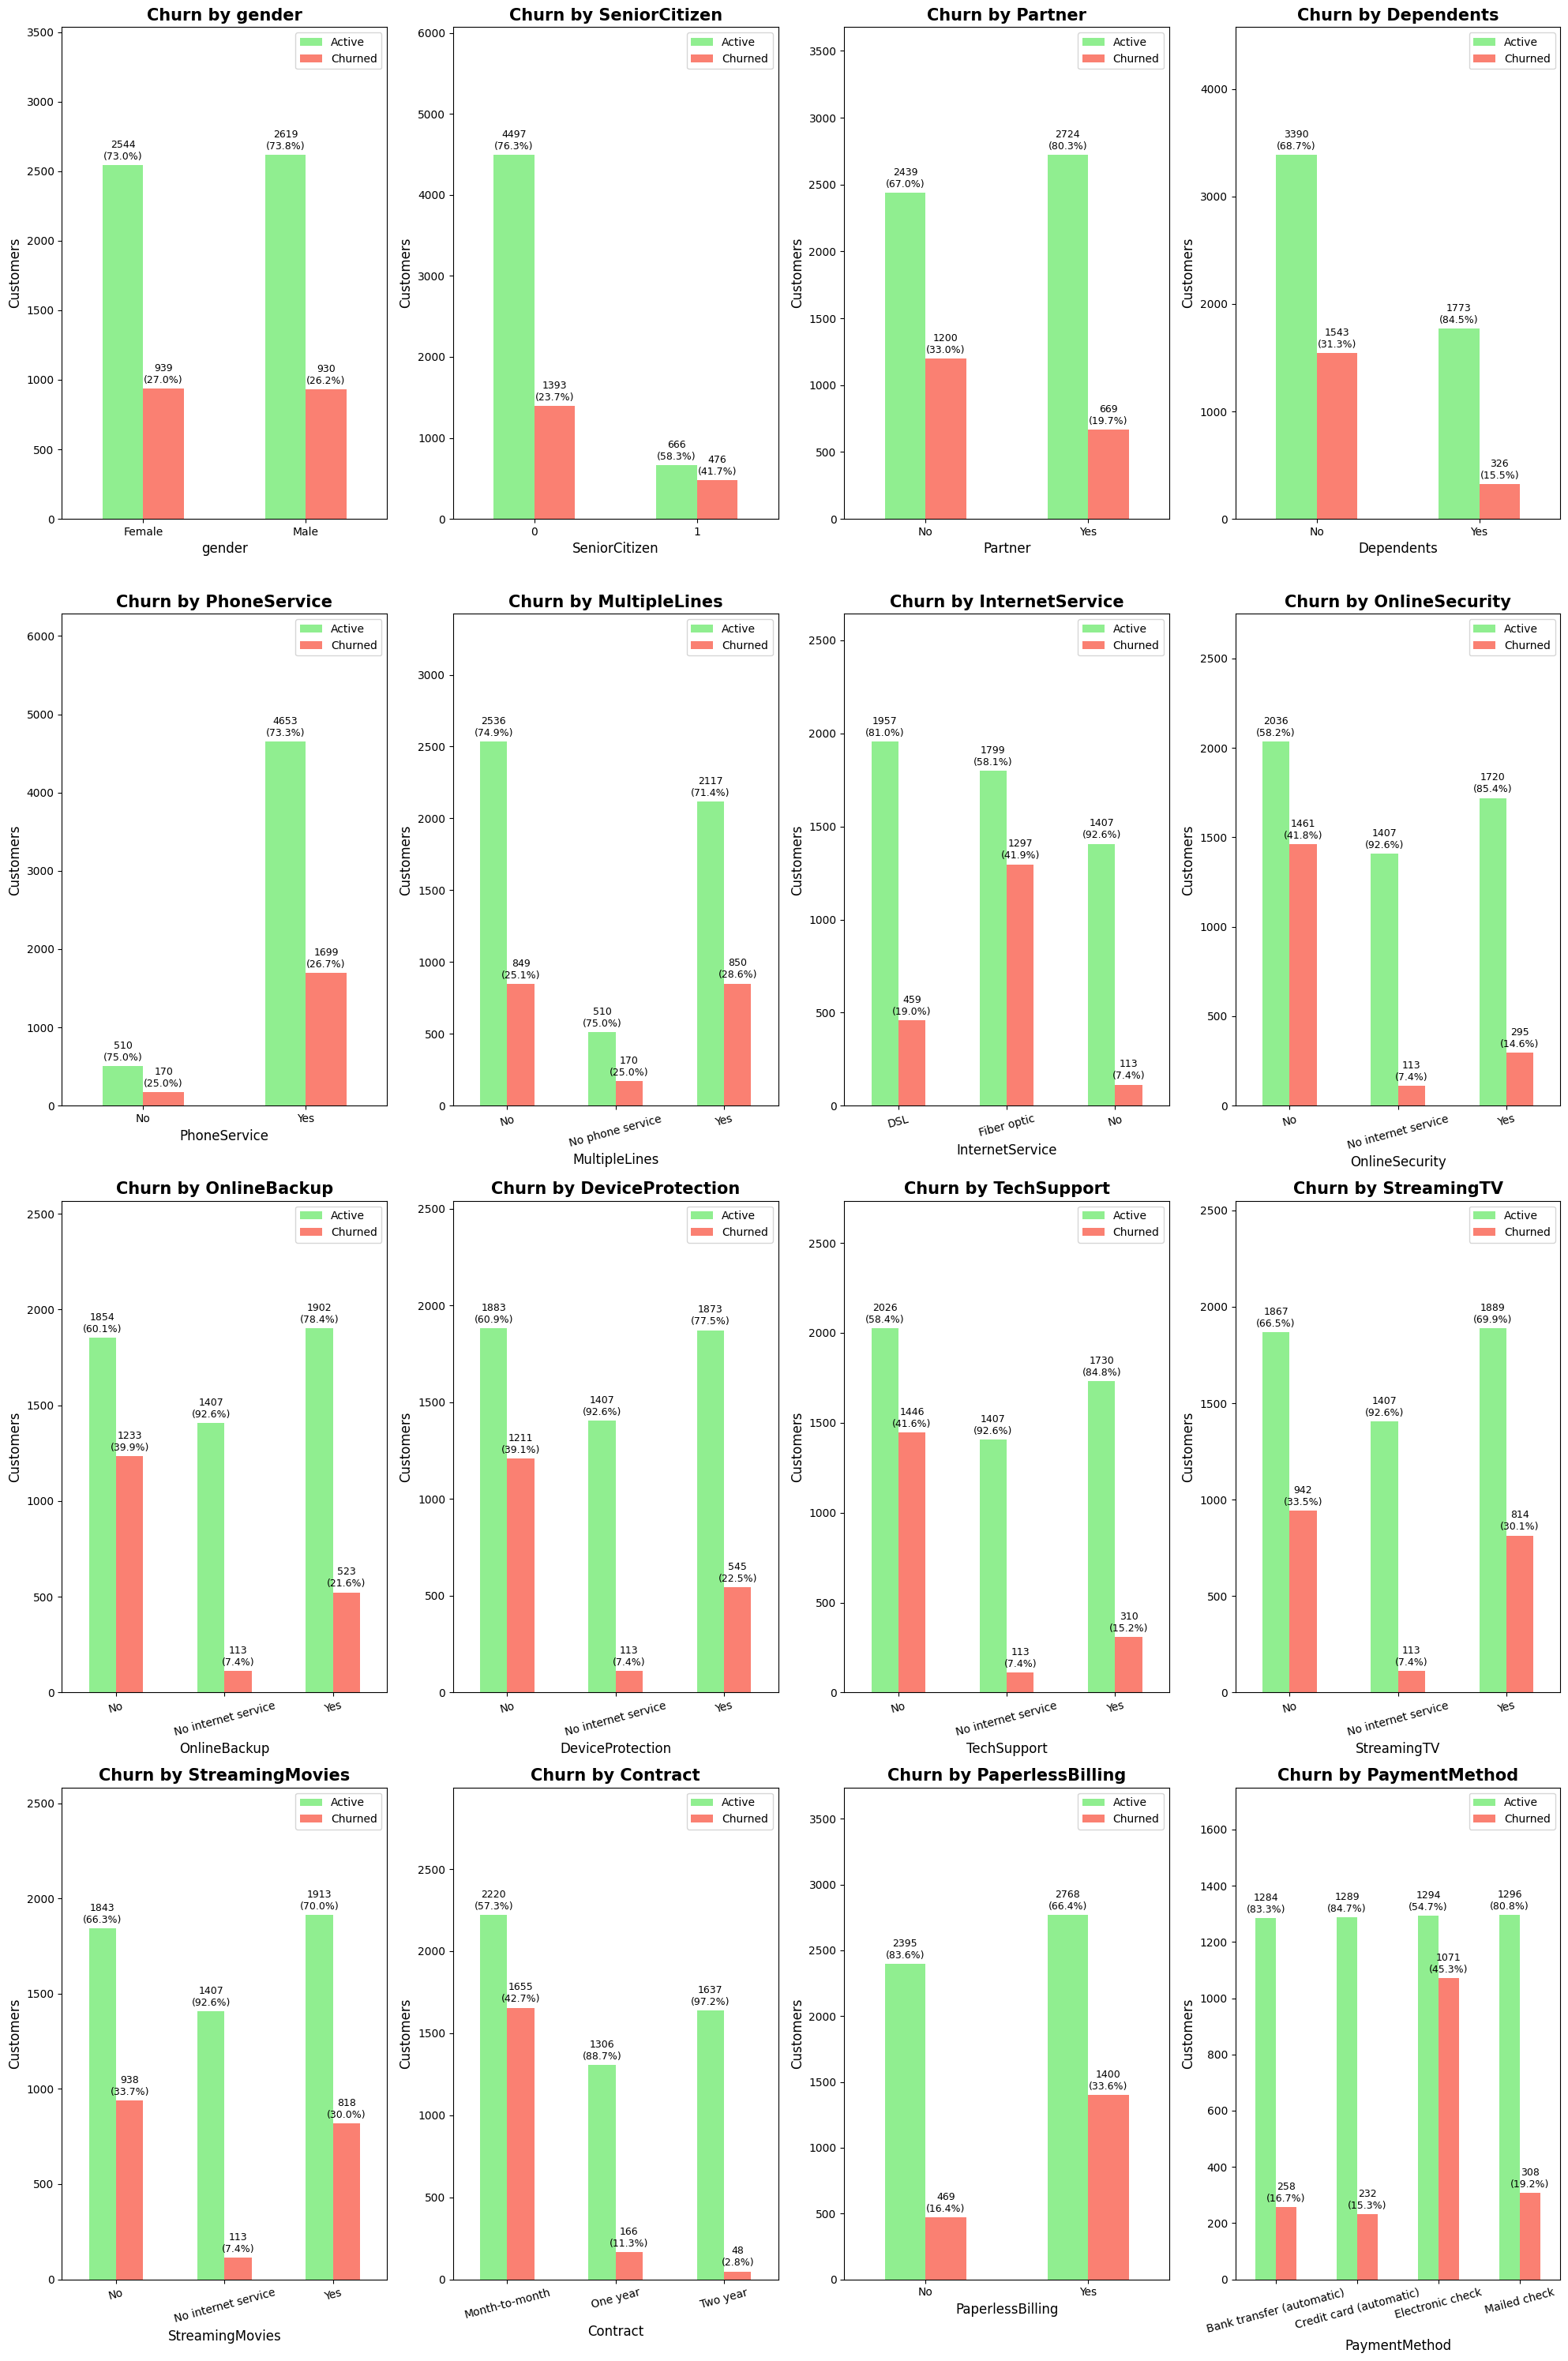

In [15]:
# Complete list of features (15 total)
categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod'
]


# 1. Create a 4x4 grid
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 30))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    # Calculate Counts and Percentages
    ct = pd.crosstab(df[col], df["Churn"])
    ct_pct = ct.div(ct.sum(1), axis=0) * 100

    # 2. Plot on the specific subplot
    ct.plot(kind="bar", ax=axes[i], color=['lightgreen', 'salmon'], rot=0)

    # 3. Add Labels (Count & %)
    for j, container in enumerate(axes[i].containers):
        pct_labels = ct_pct.iloc[:, j].values
        labels = [f'{int(v.get_height())}\n({p:.1f}%)' if v.get_height() > 0 else ''
                  for v, p in zip(container, pct_labels)]

        axes[i].bar_label(container, labels=labels, label_type='edge', padding=3, fontsize=9)

    # Formatting
    axes[i].set_title(f"Churn by {col}", fontsize=15, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Customers", fontsize=12)
    axes[i].legend(["Active", "Churned"], fontsize=10)
    axes[i].set_ylim(0, ct.values.max() * 1.35) # Adjusted for taller labels

    # Rotate x-labels for columns with long category names (like PaymentMethod)
    if df[col].nunique() > 2:
        axes[i].tick_params(axis='x', labelrotation=15)

# 4. Clean up layout
plt.tight_layout()
plt.show()

Key observations:

* Gender: Nearly balanced (male/female ~50%).

* SeniorCitizen: Only ~16% are seniors.

* Partner/Dependents: ~48% have partner, ~30% have dependents.

* PhoneService: ~90% have phone service.

* InternetService: Most common is fiber optic (~44%), then DSL (~34%), and ~22% with no internet.

* OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport: Majority are "No" or "No internet service".

* Contract: Month-to-month is most common (~55%), followed by two year (~24%) and one year (~21%).

* PaperlessBilling: ~60% use paperless billing.

* PaymentMethod: Electronic check is most common (~34%), then mailed check, bank transfer, credit card.

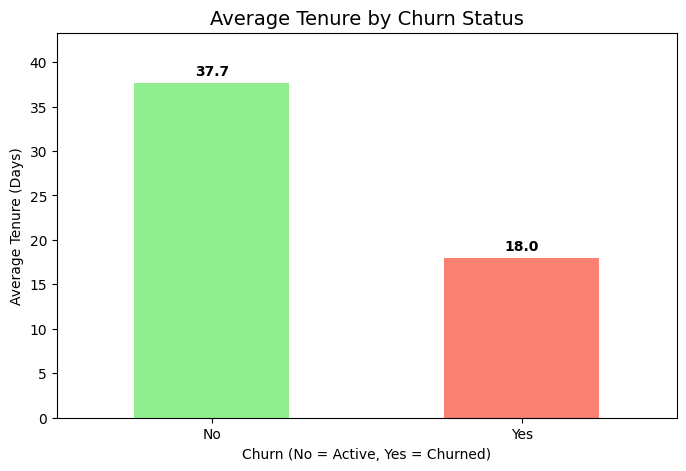

In [16]:
# Tenure vs Churn

ax = df.groupby("Churn")["tenure"].mean().plot(
    kind="bar",
    figsize=(8,5),
    color=['lightgreen', 'salmon'],
    rot=0
)

# 2. Add labels on top of the bars
for container in ax.containers:
    # Formats the mean to 1 decimal place
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3, fontweight='bold')

# Titles and labels
plt.title("Average Tenure by Churn Status", fontsize=14)
plt.xlabel("Churn (No = Active, Yes = Churned)")
plt.ylabel("Average Tenure (Days)")

# Optional: Increase y-limit to make room for labels
plt.ylim(0, df.groupby("Churn")["tenure"].mean().max() * 1.15)

plt.show()

# Univariate Analysis

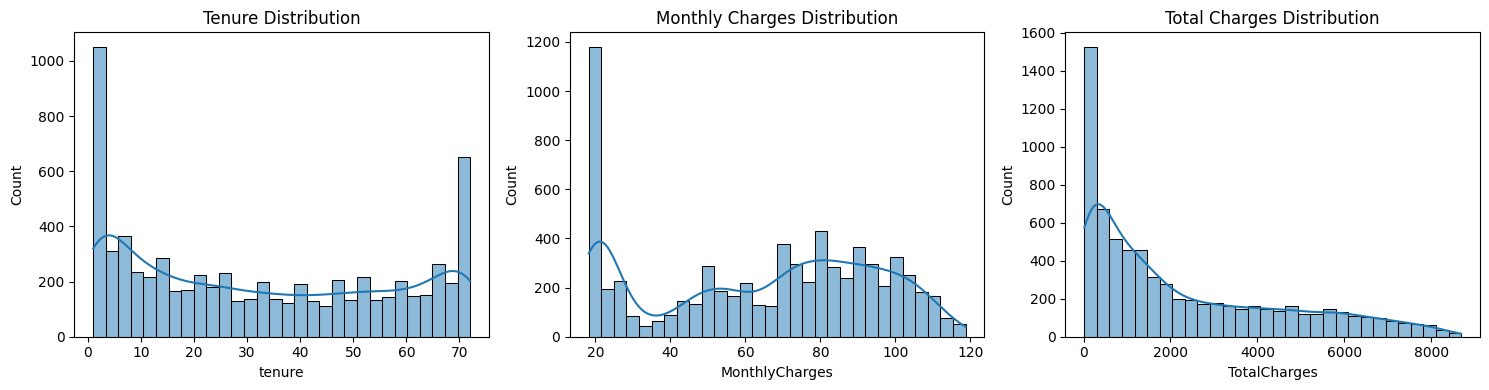

In [17]:
# Numerical Features :

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(df['tenure'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Tenure Distribution')

sns.histplot(df['MonthlyCharges'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Monthly Charges Distribution')

sns.histplot(df['TotalCharges'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('Total Charges Distribution')

plt.tight_layout()
plt.show()


Observations:

* Tenure: – many customers are either very new (0-10 months) or long-term (60+ months).

* MonthlyCharges: – peaks around $20 (basic service) and $80-100 (premium services).

* TotalCharges: Right-skewed, with a long tail – most customers have low total charges (new or low monthly charges).

# Bivariate Analysis (Relationship with Churn)

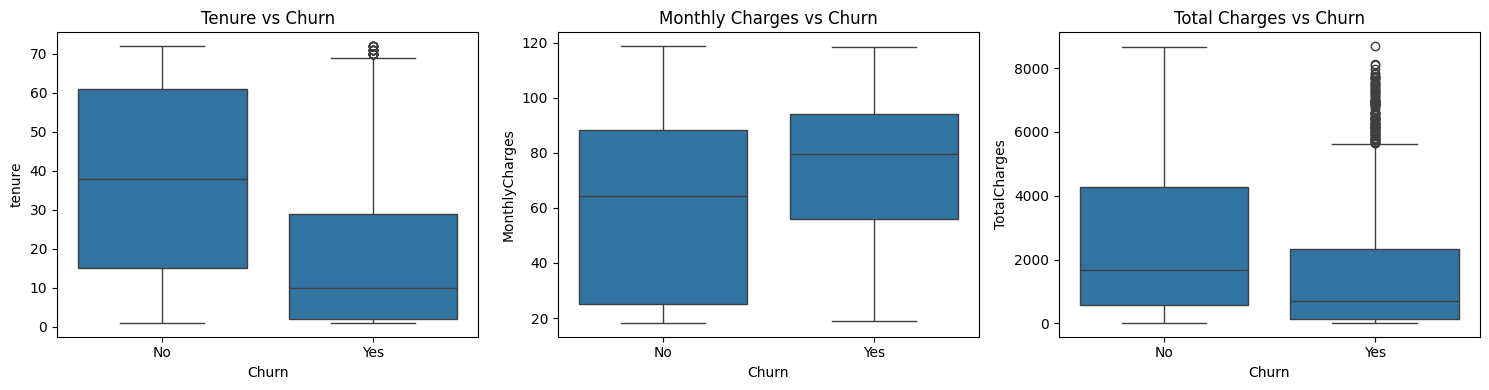

In [18]:
# Numerical Features vs. Churn

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.boxplot(x='Churn', y='tenure', data=df, ax=axes[0])
axes[0].set_title('Tenure vs Churn')
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[1])
axes[1].set_title('Monthly Charges vs Churn')
sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=axes[2])
axes[2].set_title('Total Charges vs Churn')
plt.tight_layout()
plt.show()

Observations:

- Tenure: Customers who churn have significantly lower tenure (median ~10 months) compared to non-churners (median ~38 months).

- MonthlyCharges: Churners tend to have higher monthly charges (median ~80) vs non-churners (median ~65).

- TotalCharges: Churners have lower total charges (median ~500) – likely because they are newer customers.

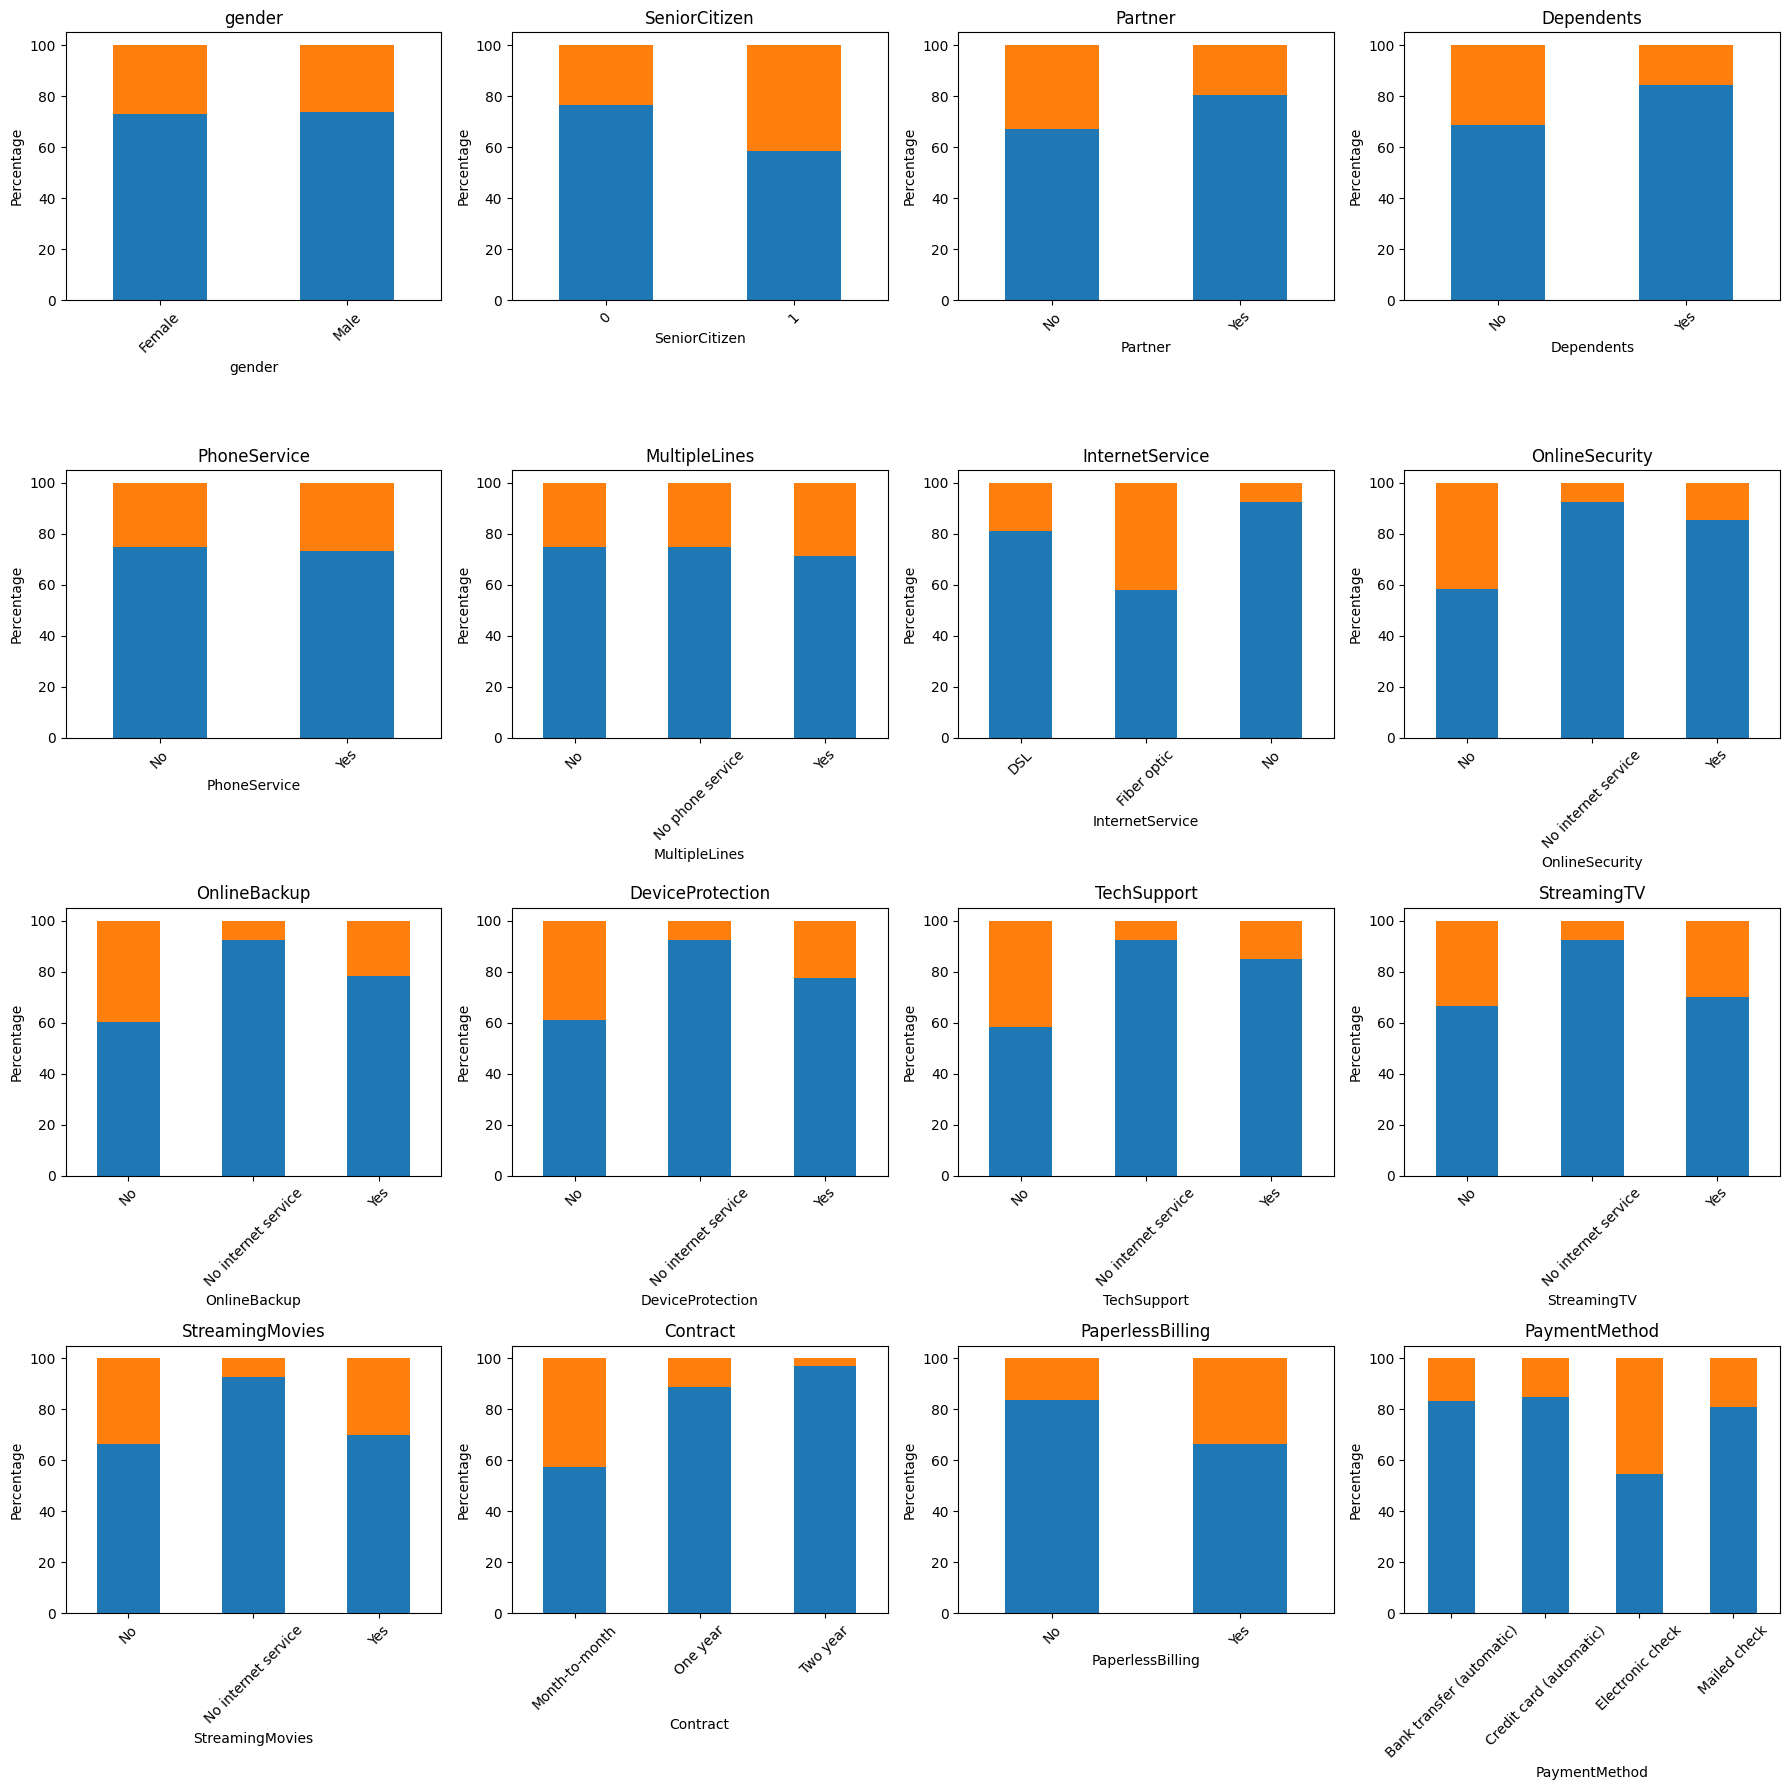

In [19]:
# Categorical Features vs. Churn

def churn_rate_by_category(col):
    return df.groupby(col)['Churn'].value_counts(normalize=True).unstack() * 100

fig, axes = plt.subplots(4, 4, figsize=(18, 18))
axes = axes.flatten()
for i, col in enumerate(categorical_cols):
    churn_rate_by_category(col).plot(kind='bar', stacked=True, ax=axes[i], legend=False)
    axes[i].set_title(col)
    axes[i].set_ylabel('Percentage')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

observations:

- Gender: Nearly balanced (male/female ~50%).

- SeniorCitizen: Only ~16% are seniors.

- Partner/Dependents: ~48% have partner, ~30% have dependents.

- PhoneService: ~90% have phone service.

- InternetService: Most common is fiber optic (~44%), then DSL (~34%), and ~22% with no internet.

- OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport: Majority are "No" or "No internet service".

- Contract: Month-to-month is most common (~55%), followed by two year (~24%) and one year (~21%).

- PaperlessBilling: ~60% use paperless billing.

- PaymentMethod: Electronic check is most common (~34%), then mailed check, bank transfer, credit card.

# Bivariate Analysis (Relationship with Churn)

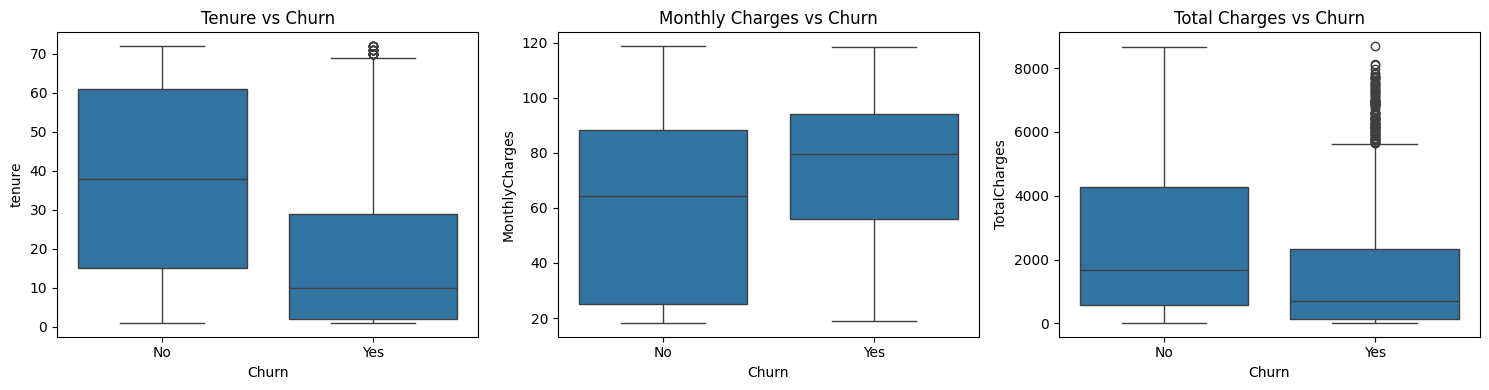

In [20]:
# Numerical Features vs. Churn

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.boxplot(x='Churn', y='tenure', data=df, ax=axes[0])
axes[0].set_title('Tenure vs Churn')
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[1])
axes[1].set_title('Monthly Charges vs Churn')
sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=axes[2])
axes[2].set_title('Total Charges vs Churn')
plt.tight_layout()
plt.show()


Observations:

- Tenure: Customers who churn have significantly lower tenure (median ~10 months) compared to non-churners (median ~38 months).

- MonthlyCharges: Churners tend to have higher monthly charges (median ~80) vs non-churners (median ~65).

- TotalCharges: Churners have lower total charges (median ~500) – likely because they are newer customers.

# Advanced Bivariate Analysis

/tmp/ipython-input-3374525592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 6, 12, 24, 48, 72],
/tmp/ipython-input-3374525592.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack() * 100


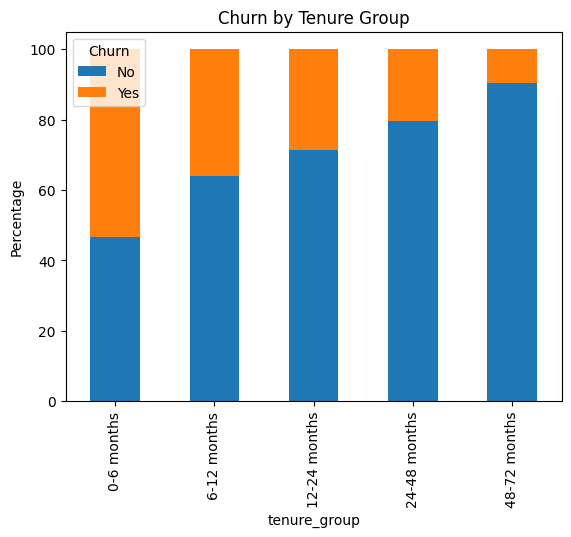

In [21]:
# Create tenure bins and see churn rate :

df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 6, 12, 24, 48, 72],
                             labels=['0-6 months', '6-12 months', '12-24 months', '24-48 months', '48-72 months'])
churn_by_tenure = df.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack() * 100
churn_by_tenure.plot(kind='bar', stacked=True)
plt.title('Churn by Tenure Group')
plt.ylabel('Percentage')
plt.show()

Observation
- Churn rate drops sharply after first 6 months: ~50% in first 6 months, ~30% in 6-12, then declines further.

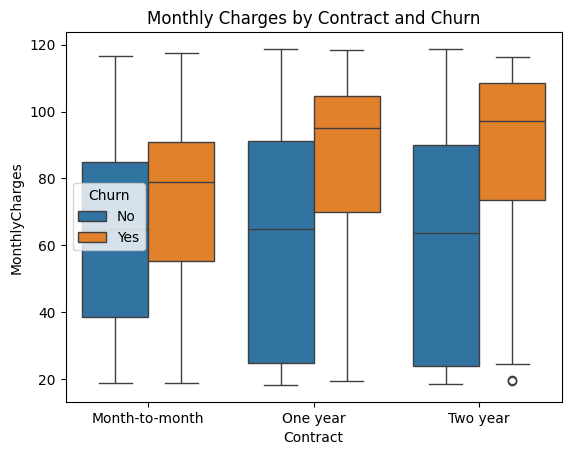

In [22]:
 # Monthly charges and contract type :

sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Monthly Charges by Contract and Churn')

plt.show()

- Month-to-month customers have higher median monthly charges, and among them churners have even higher charges.

# Correlation Analysis
### Generating a full Correlation Heatmap

(25, 25)


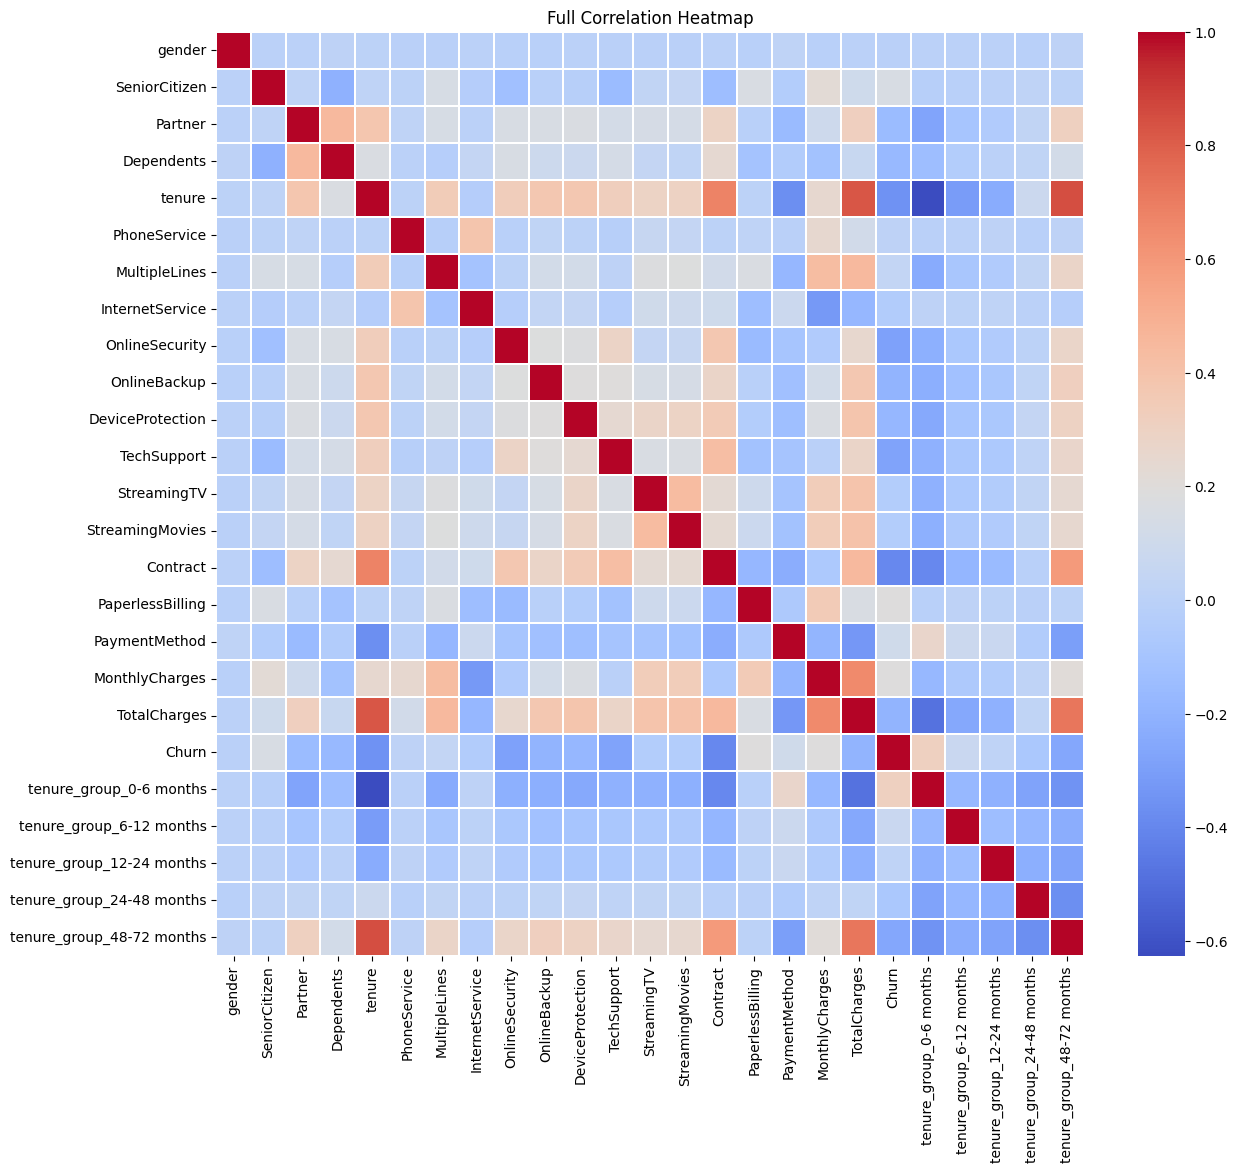

In [23]:
data_encoded = df.copy()

for col in data_encoded.columns:
    if data_encoded[col].dtype == "object":
        data_encoded[col] = data_encoded[col].astype("category").cat.codes
data_to_process = data_encoded.drop(columns=["customerID"])

df_encoded = pd.get_dummies(data_to_process, drop_first=False)

corr = df_encoded.corr()

print(corr.shape)
plt.figure(figsize=(14,12))

sns.heatmap(
    corr,
    cmap="coolwarm",
    linewidths=0.3
)

plt.title("Full Correlation Heatmap")
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

### Reviewing the heatmap

The correlation heatmap illustrates the pairwise linear relationships among all variables in the dataset, with most features showing weak to moderate associations, indicating limited overall multicollinearity.
- Strong positive correlations are observed among numeric billing variables, particularly between tenure and TotalCharges, suggesting that longer customer retention is associated with increased cumulative spending.
- Demographic attributes (e.g., gender, partner status, dependents) display minimal correlations with other variables, implying relatively low direct linear influence within the dataset.
- A dense cluster of correlations appears among internet-related service features, reflecting structural dependencies created by bundled services and one-hot encoding of categorical variables.
- Contract types and payment methods exhibit negative correlations with alternative categories, which is expected due to their mutually exclusive nature rather than substantive behavioural relationships.
- Variables associated with longer-term commitments and service support tend to show negative relationships with churn, whereas higher-cost or flexible service options demonstrate positive associations, highlighting potential predictors for customer retention modeling.

## Generating a Churn-Focused Heatmap (Feature × Target)

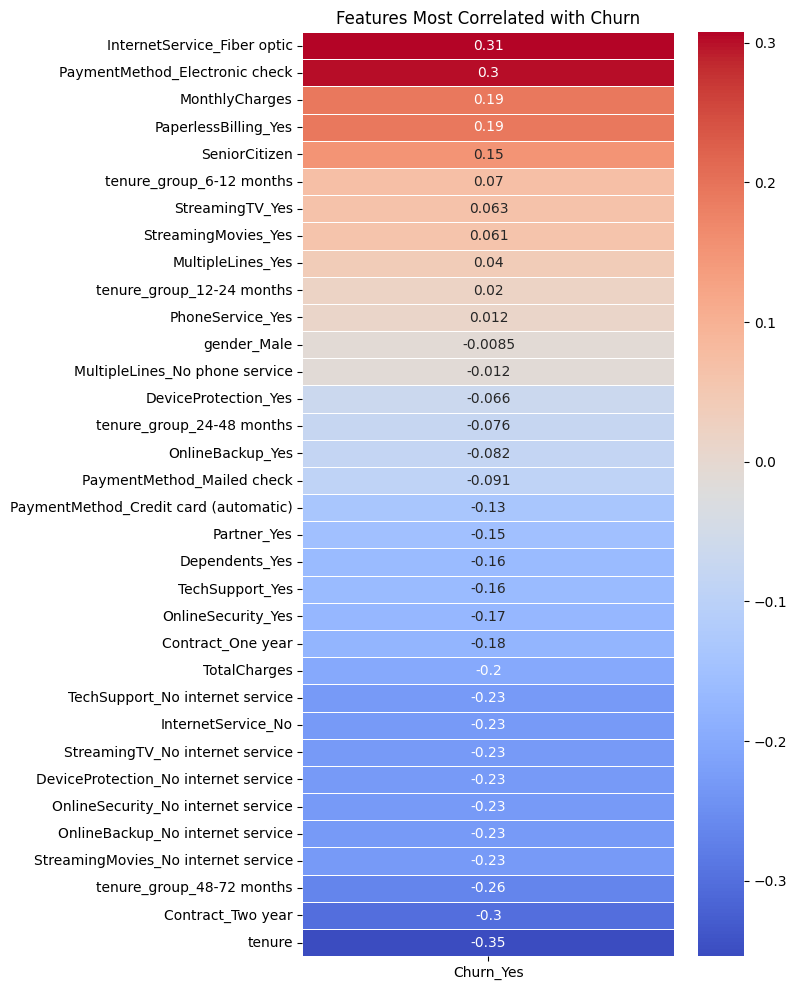

In [24]:
data_to_process = df.drop(columns=["customerID"])

data_to_process["TotalCharges"] = pd.to_numeric(data_to_process["TotalCharges"], errors="coerce")

df_encoded = pd.get_dummies(data_to_process, drop_first=True)

corr = df_encoded.corr()

churn_corr = corr[["Churn_Yes"]].sort_values(
    by="Churn_Yes",
    ascending=False
)

churn_corr = churn_corr.drop(index="Churn_Yes")

plt.figure(figsize=(6,12))

sns.heatmap(
    churn_corr,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Features Most Correlated with Churn")
plt.show()

## Reviewing the heatmap:

- The heatmap presents the strength and direction of linear relationships between individual features and the target variable Churn_Yes, with correlations ranging from moderately positive (red tones) to moderately negative (blue tones).
- Features such as InternetService_Fiber optic and PaymentMethod_Electronic check show the strongest positive correlations with churn, suggesting that customers using higher-cost internet services or manual payment methods may exhibit a greater tendency to leave.
- Moderate positive associations are also observed for MonthlyCharges, PaperlessBilling_Yes, and SeniorCitizen, indicating that higher billing intensity and certain customer segments may be linked to increased churn likelihood.
- Negative correlations are strongest for tenure and Contract_Two year, implying that long-term customers and those on extended contracts are less likely to churn. Additional retention-related signals appear for OnlineSecurity_Yes, TechSupport_Yes, and Dependents_Yes.
- Several “No internet service” variables display similar negative correlations due to structural encoding effects, reflecting mutually exclusive service configurations rather than independent behavioural drivers.

Accuracy Metrics: 0.7327647476901208
ROC AUC Curve 0.8365399050582127

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.71      0.79      1033
           1       0.50      0.81      0.62       374

    accuracy                           0.73      1407
   macro avg       0.70      0.76      0.71      1407
weighted avg       0.80      0.73      0.75      1407



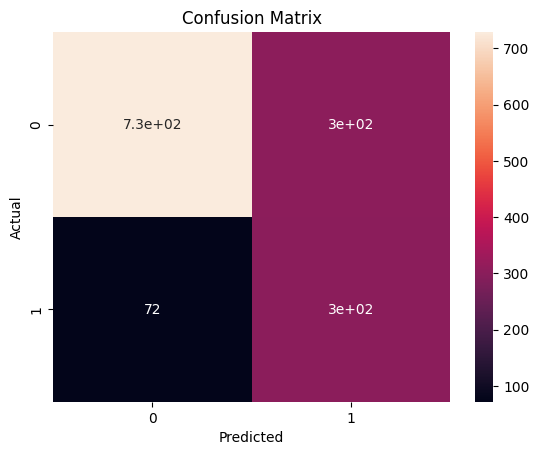

In [27]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

data = data_to_process.copy()

#Encoding
num_cols = data.select_dtypes(include=np.number).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

cat_cols = data.select_dtypes(include='object').columns
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])

le = LabelEncoder()
data['Churn'] = le.fit_transform(data['Churn'])

data_encoded = pd.get_dummies(data, drop_first=True)

X = data_encoded.drop("Churn", axis=1)
y = data_encoded["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]

print("Accuracy Metrics:", accuracy_score(y_test, y_pred))
print("ROC AUC Curve", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

plt.figure()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



The built model is

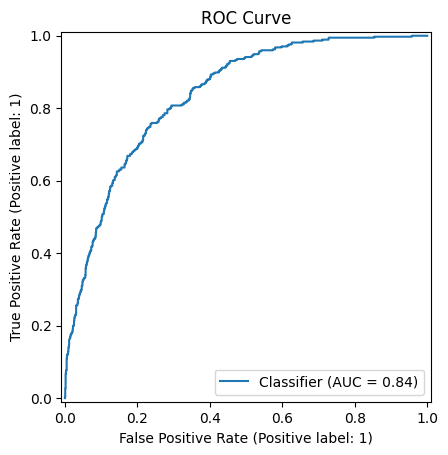


Top Drivers of Churn:

                                  Feature  Coefficient
10            InternetService_Fiber optic     0.791573
21                        StreamingTV_Yes     0.290840
23                    StreamingMovies_Yes     0.280322
9                       MultipleLines_Yes     0.239358
28         PaymentMethod_Electronic check     0.181644
26                   PaperlessBilling_Yes     0.127316
3                            TotalCharges     0.107259
17                   DeviceProtection_Yes     0.093216
0                           SeniorCitizen     0.077729
27  PaymentMethod_Credit card (automatic)     0.033499
29             PaymentMethod_Mailed check     0.005689
7                        PhoneService_Yes     0.004867
8          MultipleLines_No phone service    -0.004867
4                             gender_Male    -0.006271
15                       OnlineBackup_Yes    -0.008208


In [28]:
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC Curve")
plt.show()

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print("\nTop Drivers of Churn:\n")
print(coefficients.head(15))

Before SMOTE: Churn
0    4130
1    1495
Name: count, dtype: int64
After SMOTE: Churn
0    4130
1    4130
Name: count, dtype: int64
Accuracy: 0.736318407960199
ROC AUC: 0.8345442638905426

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.80      0.74      0.75      1407



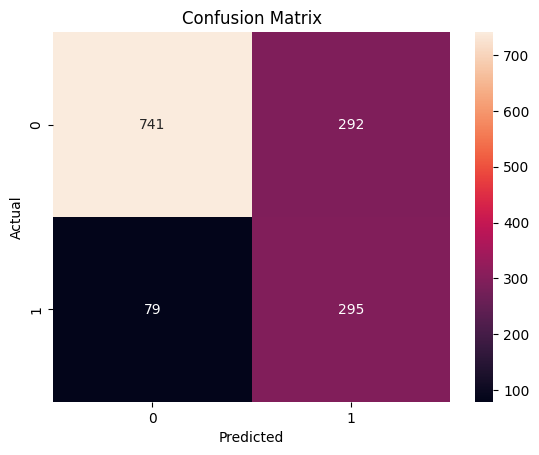

In [29]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_bal).value_counts())

model = LogisticRegression(max_iter=1000)
model.fit(X_train_bal, y_train_bal)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

plt.figure()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()